## 2D Ising Model with Visualisation

In [9]:
import numpy as np
from numpy import random
import IsingModel as IM
import matplotlib.pyplot as plt
import matplotlib
from utils import validate_input
matplotlib.use('TKAgg')

: 

In [7]:
# system parameters, as fixed by user
n = 50          # number of sites given by n x n (square)
T = 1           # temperature
nstep = 10000   # the 'time' for this dynamical evolution
dynamics = 'G'  # G : Glauber , K : Kawasaki

# validating the dynamics input
try:
    print(validate_input(dynamics))
except ValueError as e:
    print(e)

# initialise lattice sites
rng = random.default_rng()
lattice = random.choice(np.array([-1,1]), (n,n))

# all spin down initial lattice (ground state for Glauber)
#lattice = -np.ones((n,n))

# half up, half down configuration (ground state for Kawasaki)
#lattice = np.concatenate((np.ones((int(n/2),n)), -np.ones((int(n/2),n))), axis=0)

system = IM.IsingLattice(lattice)             # initial system
energy_lattice = system.return_energy_total() # initial lattice energy

Value 'G' is valid.


In [8]:
energy_list = []
magnetisation_list = []
time_list = []

fig = plt.figure()
im  = plt.imshow(system.lattice, animated=True, vmin=-1, vmax=1)

if dynamics == 'G':
    print('Simulate with Glauber dynamics.')
    print('Sweep, Energy, Magnetisation')
    for sweep in range(nstep):
        for _ in range(n**2):
            glauber_site, delta_E = system.perform_glauber_step()
            metro_bool, delta_E = system.perform_metropolis(delta_E, T)

            i, j = glauber_site

            if metro_bool == True:
                lattice[i][j] = - lattice[i][j]
                system = IM.IsingLattice(lattice)
                energy_lattice += delta_E

        #occasionally plot or update measurements
        if (sweep%10) == 0:
            # update measurements
            print(f'{sweep} {energy_lattice} {system.return_magnetisation()}')
            energy_list.append(energy_lattice)
            magnetisation_list.append(system.return_magnetisation())
            time_list.append(sweep)

            # show animation
            
            plt.cla()
            im=plt.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            plt.draw()
            plt.pause(0.0001)

if dynamics == 'K':
    print('Simulate with Kawasaki dynamics.')
    print('Sweep, Energy, Magnetisation')
    for sweep in range(nstep):
        for _ in range(n**2): 
            kawasaki_site1, kawasaki_site2, delta_E = system.perform_kawasaki_step()
            metro_bool, delta_E = system.perform_metropolis(delta_E, T)

            i1, j1 = kawasaki_site1
            i2, j2 = kawasaki_site2

            if metro_bool == True:
                lattice[i1][j1], lattice[i2][j2] = lattice[i2][j2], lattice[i1][j1]
                system = IM.IsingLattice(lattice)
                energy_lattice += delta_E

        #occasionally plot or update measurements
        if (sweep%10) == 0:
            # update measurements
            print(f'{sweep} {energy_lattice} {system.return_magnetisation()}')
            energy_list.append(energy_lattice)
            magnetisation_list.append(system.return_magnetisation())
            time_list.append(sweep)

            # show animation
            
            plt.cla()
            im=plt.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            plt.draw()
            plt.pause(0.0001)
            

Simulate with Glauber dynamics.
Sweep, Energy, Magnetisation
0 -1924 -10
10 -4144 -212
20 -4296 -58
30 -4384 94
40 -4452 82
50 -4484 210
60 -4516 242
70 -4524 198
80 -4556 268
90 -4576 224
100 -4580 230
110 -4588 348
120 -4584 394
130 -4604 468
140 -4608 506
150 -4628 602
160 -4632 652
170 -4656 792
180 -4660 866
190 -4676 852
200 -4676 850
210 -4700 988


KeyboardInterrupt: 

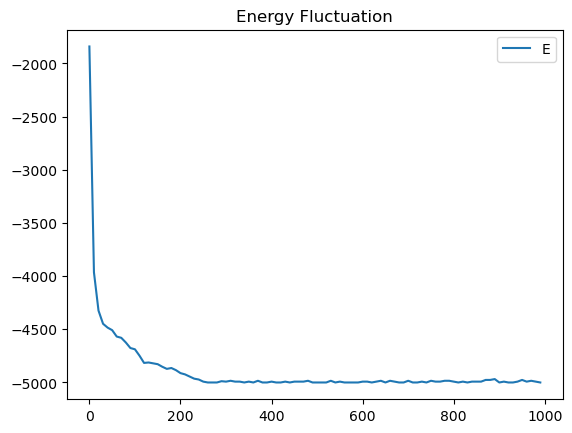

In [4]:
%matplotlib inline
plt.plot(time_list, energy_list, label='E')
plt.title('Energy Fluctuation')
plt.legend(loc='best')
plt.show()